In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

print("hello")

hello


# Hello there,
## quantum guy

In [2]:
data_point = 0.75 * np.pi
qc = QuantumCircuit(1)
qc.ry(data_point, 0)
qc.s(0)
print(qc)

   ┌──────────┐┌───┐
q: ┤ Ry(3π/4) ├┤ S ├
   └──────────┘└───┘


In [3]:
theta = 0.25 * np.pi 
qc_lat = QuantumCircuit(1)
qc_lat.ry(theta, 0)
state = Statevector.from_instruction(qc_lat)
print(f"Statevector: {state.data}")
state.draw('latex')

Statevector: [0.92387953+0.j 0.38268343+0.j]


<IPython.core.display.Latex object>

In [4]:
qc_lon = qc_lat.copy()
qc_lon.s(0) 
state_phased = Statevector.from_instruction(qc_lon)
print(f"Phased Statevector: {state_phased.data}")
state_phased.draw('latex')

Phased Statevector: [0.92387953+0.j         0.        +0.38268343j]


<IPython.core.display.Latex object>

In [5]:
prob_lat = Statevector.from_instruction(qc_lat).probabilities_dict()
prob_lon = Statevector.from_instruction(qc_lon).probabilities_dict()

print(f"Probabilities before S-gate: {prob_lat}")
print(f"Probabilities after S-gate:  {prob_lon}")
print("\nConclusion: The 'Confidence' (Cat vs Dog) hasn't changed, but the 'Phase' has!")

Probabilities before S-gate: {np.str_('0'): np.float64(0.8535533905932737), np.str_('1'): np.float64(0.14644660940672624)}
Probabilities after S-gate:  {np.str_('0'): np.float64(0.8535533905932737), np.str_('1'): np.float64(0.14644660940672624)}

Conclusion: The 'Confidence' (Cat vs Dog) hasn't changed, but the 'Phase' has!


In [6]:
qc_a = qc_lat.copy()
qc_a.h(0)
qc_b = qc_lon.copy()
qc_b.h(0)
print(f"Probabilities A (No Phase): {Statevector.from_instruction(qc_a).probabilities_dict()}")
print(f"Probabilities B (With Phase): {Statevector.from_instruction(qc_b).probabilities_dict()}")


Probabilities A (No Phase): {np.str_('0'): np.float64(0.8535533905932735), np.str_('1'): np.float64(0.1464466094067262)}
Probabilities B (With Phase): {np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}


Final 2-Qubit State Map:
{np.str_('00'): np.float64(0.5000000000000001), np.str_('11'): np.float64(0.5000000000000001)}


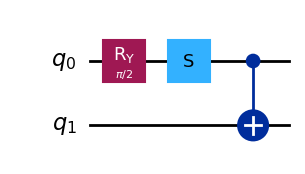

In [7]:
qc_interaction = QuantumCircuit(2)
qc_interaction.ry(0.5 * np.pi, 0)
qc_interaction.s(0) 
qc_interaction.cx(0, 1)
final_state = Statevector.from_instruction(qc_interaction)
print("Final 2-Qubit State Map:")
print(final_state.probabilities_dict())
qc_interaction.draw('mpl')

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Create the circuit from your image
qc = QuantumCircuit(2)

# Step 1: Rotate q0 to the equator
qc.ry(np.pi/2, 0) 

# Step 2: Apply the S-gate phase shift to q0
qc.s(0)

# Step 3: The CNOT gate (The "Entangler")
# This ties the fate of q1 to q0
qc.cx(0, 1)

# Let's look at the math
state = Statevector.from_instruction(qc)
print("Final Quantum State (Amplitudes):")
print(state.data)

# This will show you the probabilities of [q1, q0] 
# (Note: Qiskit reads bitstrings right-to-left)
print("\nProbabilities of [q1, q0]:")
print(state.probabilities_dict())

Final Quantum State (Amplitudes):
[0.70710678+0.j         0.        +0.j         0.        +0.j
 0.        +0.70710678j]

Probabilities of [q1, q0]:
{np.str_('00'): np.float64(0.5000000000000001), np.str_('11'): np.float64(0.5000000000000001)}


In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def test_entanglement(angle):
    qc = QuantumCircuit(2)
    
    # Rotate q0 by the angle we chose
    qc.ry(angle, 0)
    
    # Entangle q0 and q1
    qc.cx(0, 1)
    
    state = Statevector.from_instruction(qc)
    return state.probabilities_dict()

# 1. No rotation: q0 stays |0>, so CNOT doesn't flip q1.
print("No rotation:", test_entanglement(0)) 

# 2. 180 degree rotation: q0 becomes |1>, so CNOT flips q1 to |1>.
print("Full rotation (pi):", test_entanglement(np.pi))

# 3. 90 degree rotation (Your Image!): q0 is 50/50, so they become entangled!
print("Half rotation (pi/2):", test_entanglement(np.pi/2))

No rotation: {np.str_('00'): np.float64(1.0)}
Full rotation (pi): {np.str_('00'): np.float64(3.749399456654644e-33), np.str_('11'): np.float64(1.0)}
Half rotation (pi/2): {np.str_('00'): np.float64(0.5000000000000001), np.str_('11'): np.float64(0.5000000000000001)}
